In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("C:\\Users\\Nahid\\Desktop\\EDA & Model\\churn.csv")
df = dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

RowNumber
[    1     2     3 ...  9998  9999 10000]
------------------------------------------------------------
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
------------------------------------------------------------
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
------------------------------------------------------------
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 

In [8]:
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

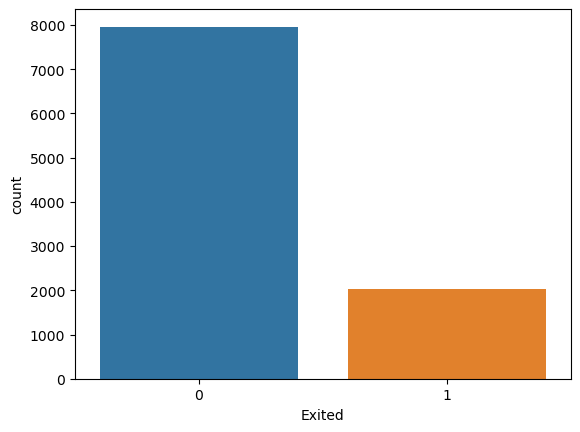

In [9]:
sns.countplot(data=dataset, x='Exited')


In [10]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Surname', 'Geography', 'Gender']

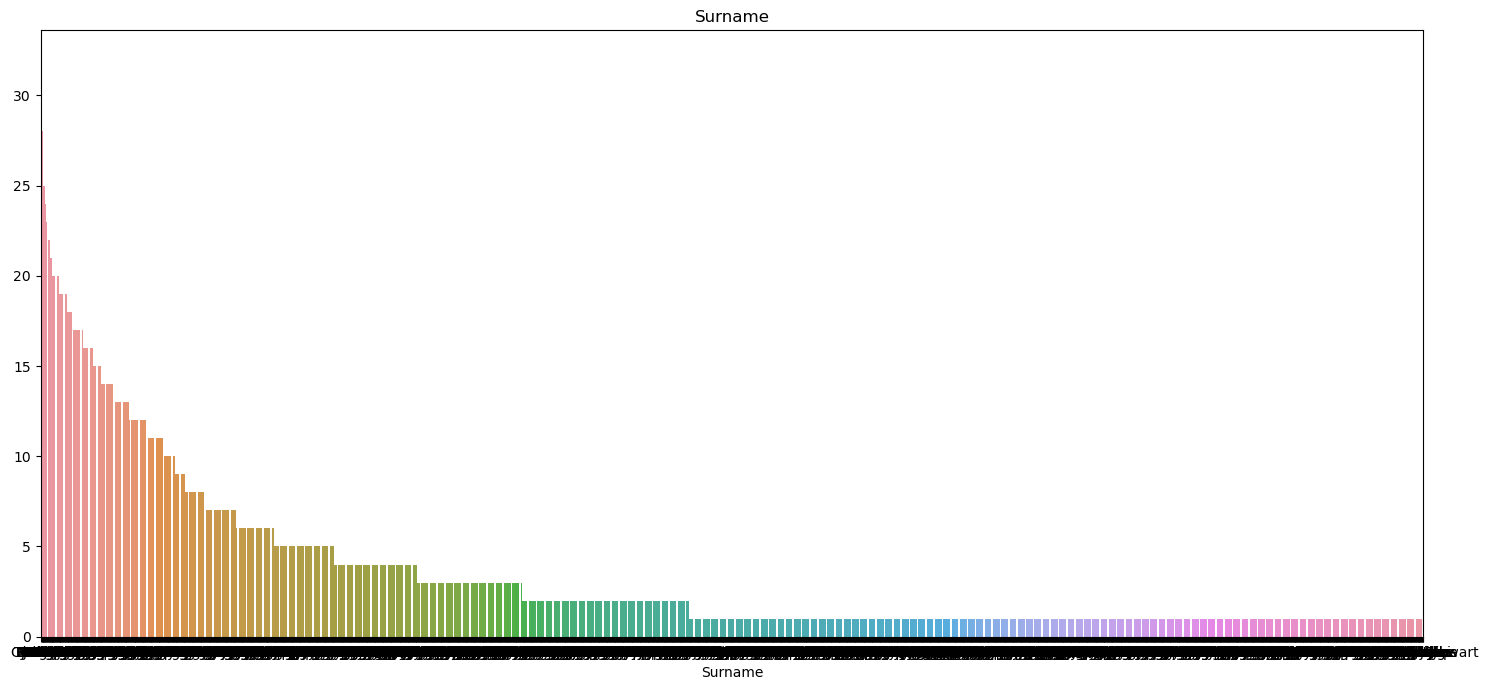

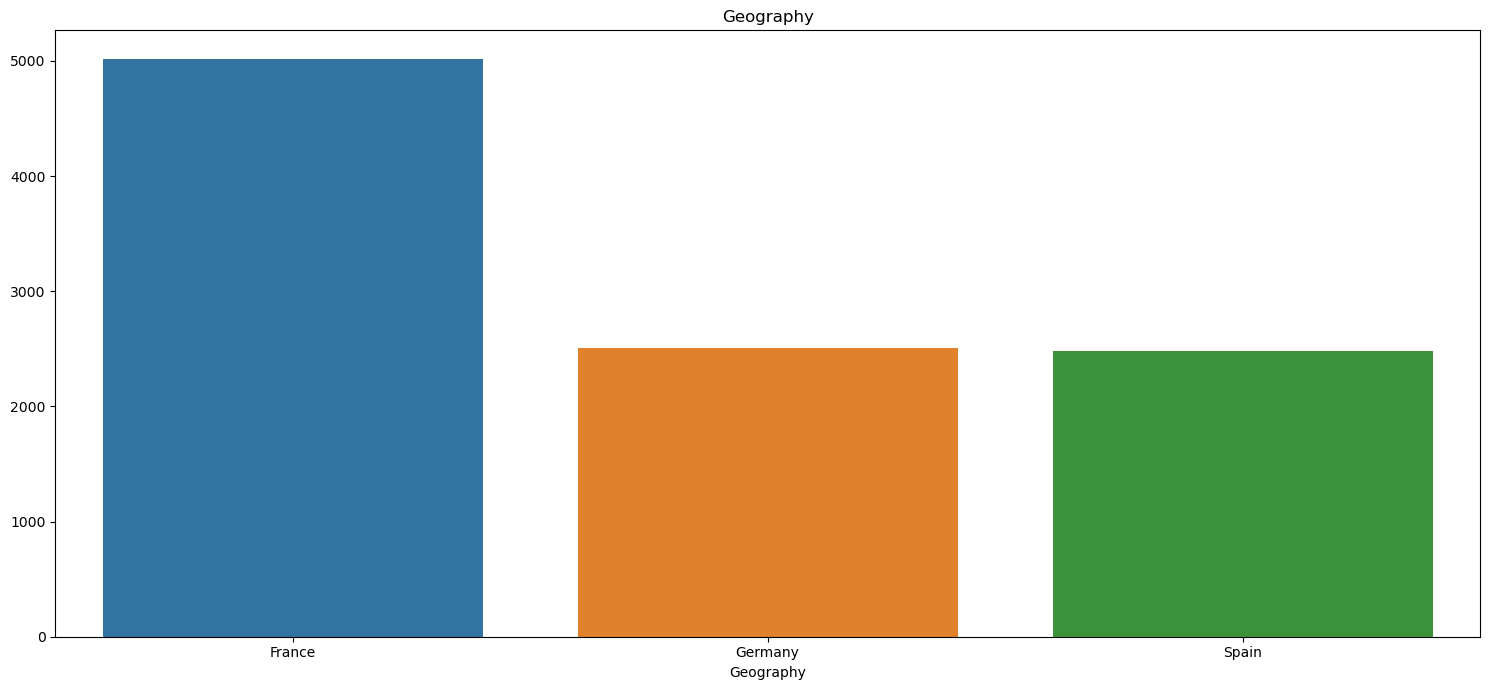

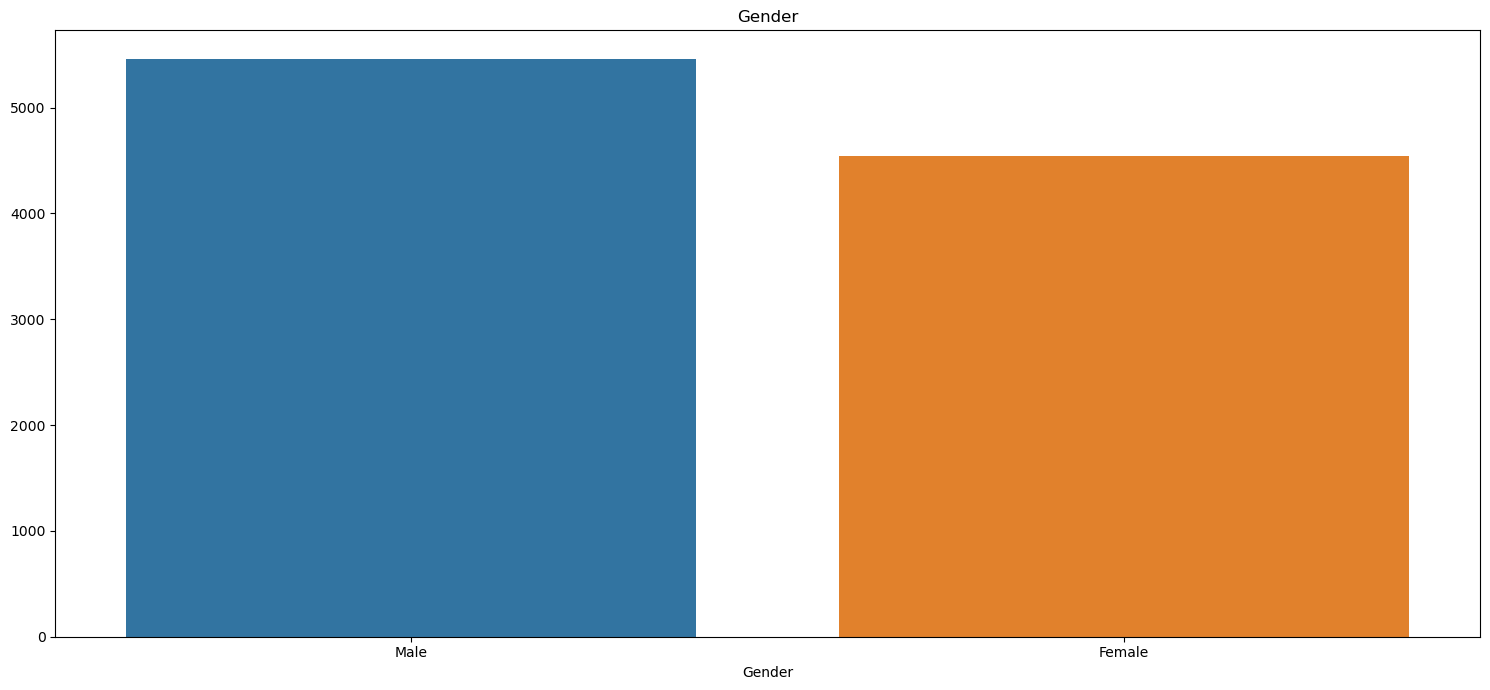

In [12]:
for col in category_cols:
    plt.figure(figsize=(15, 7))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [13]:
dataset.corr(numeric_only = 'true')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

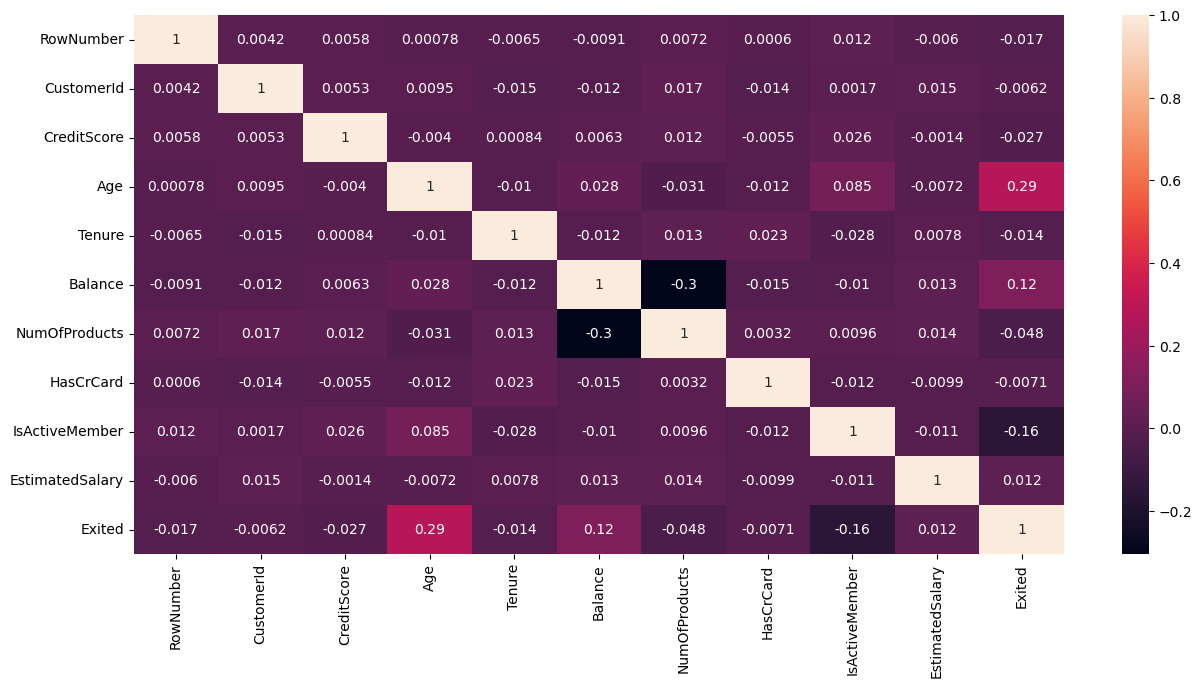

In [14]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [15]:
num_features=['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Age', 'HasCrCard', 'IsActiveMember','EstimatedSalary','Exited']

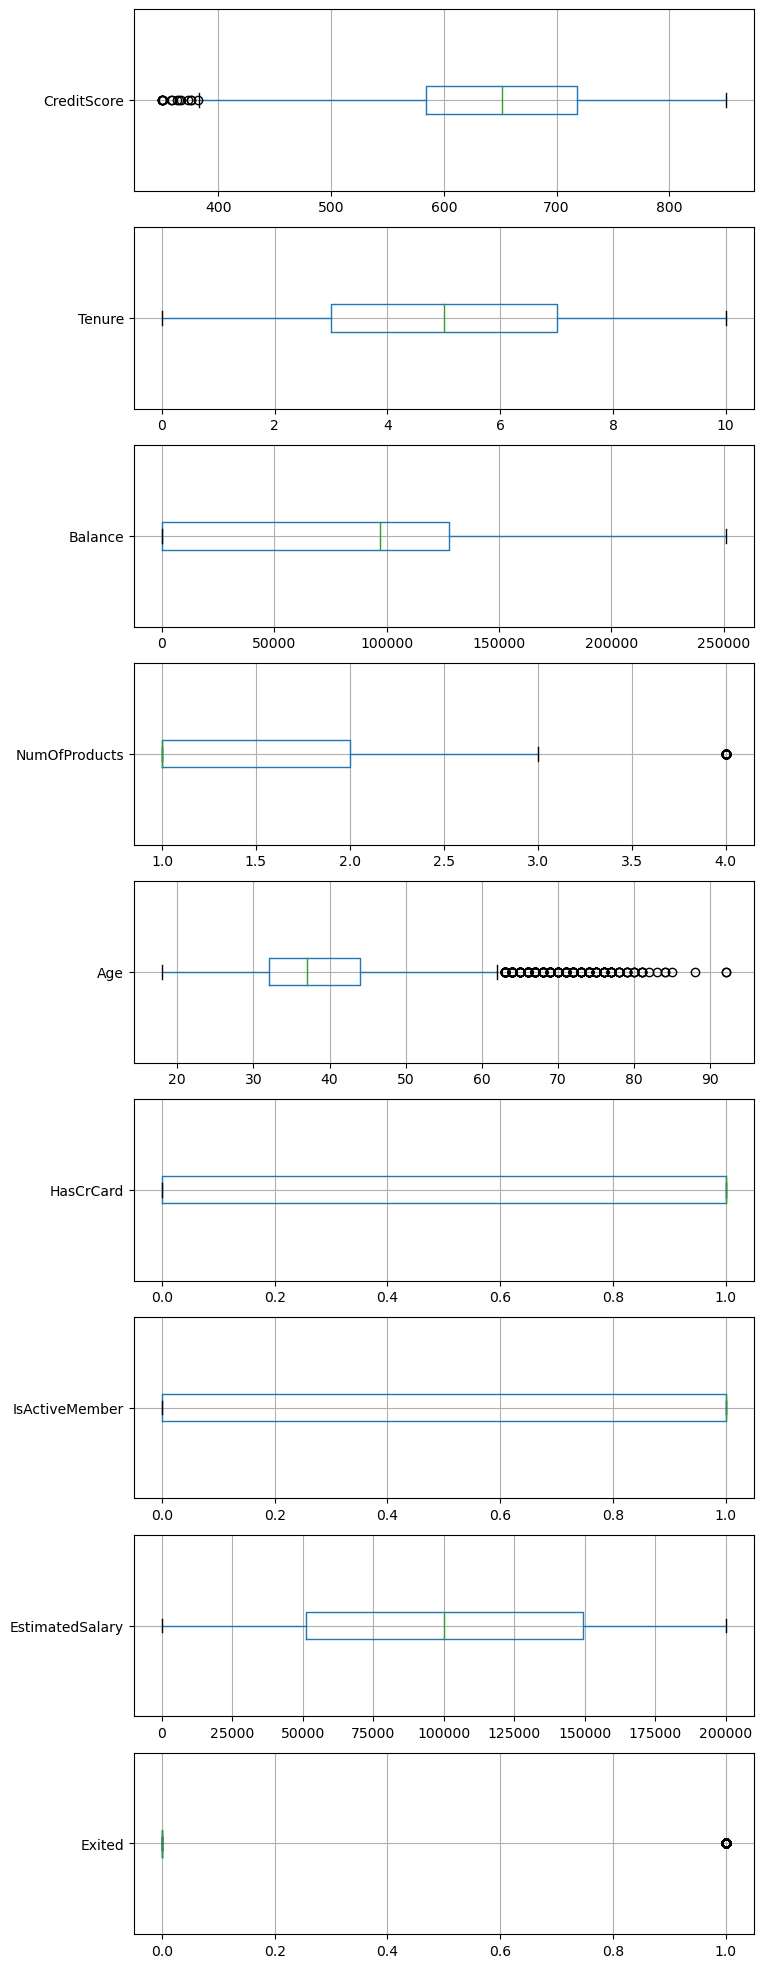

In [16]:
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

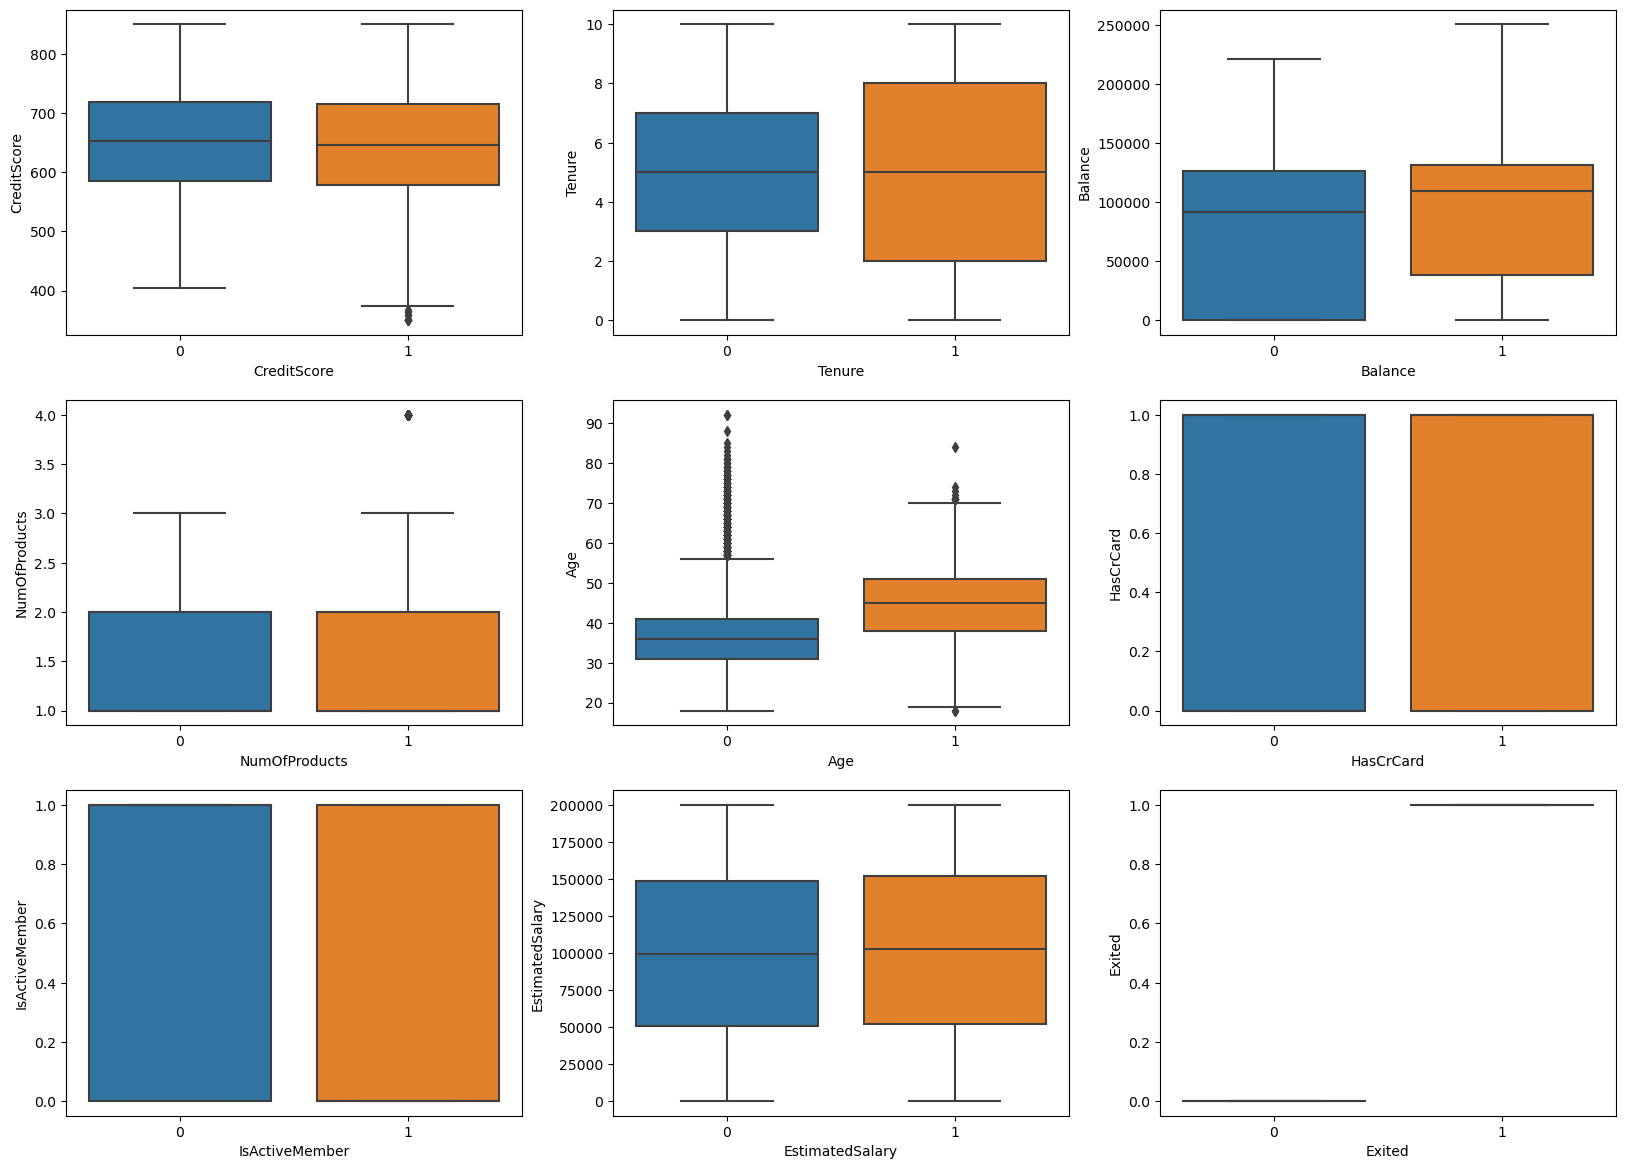

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Exited", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

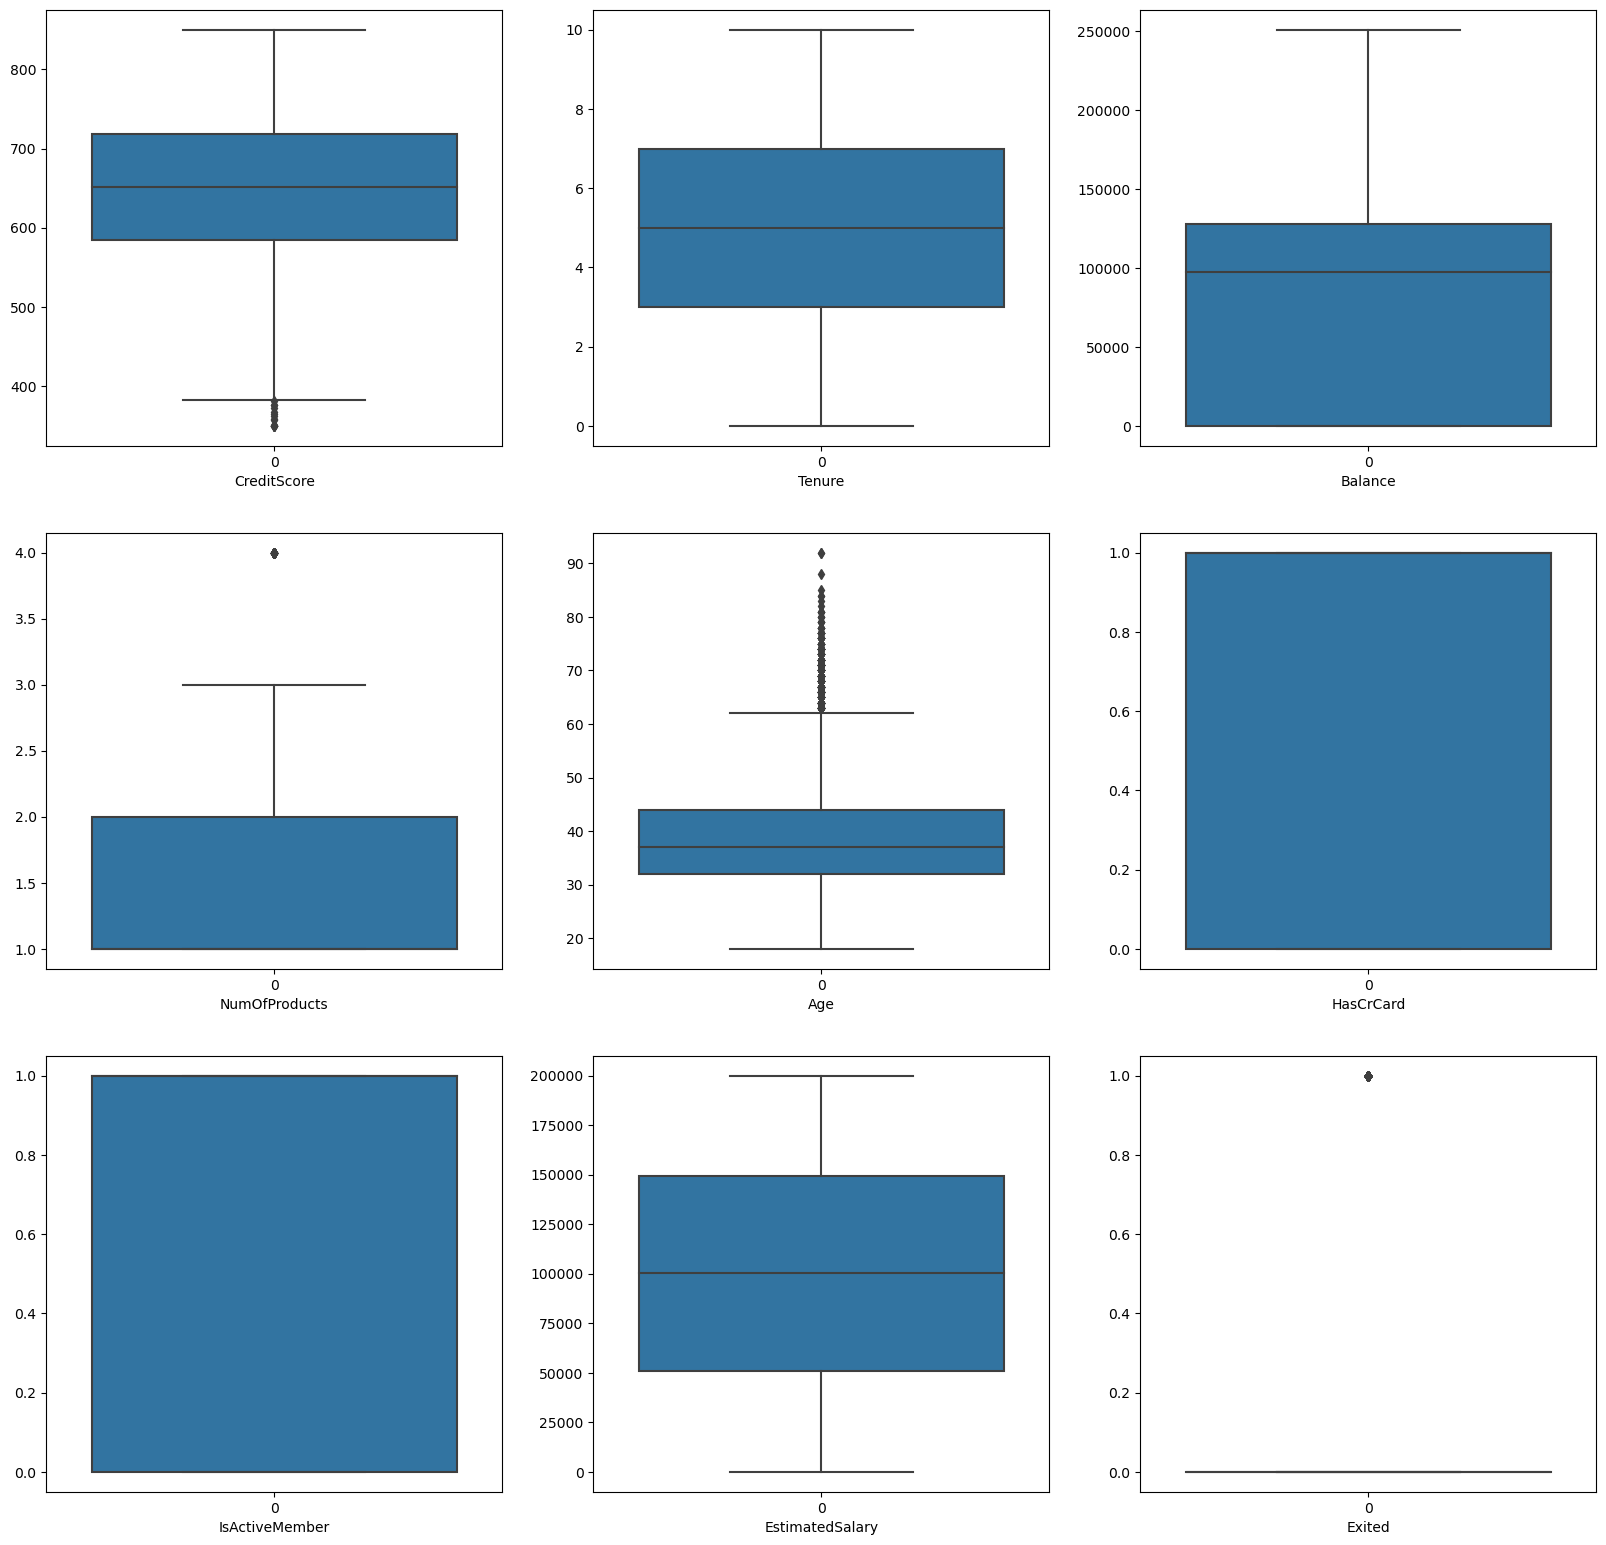

In [18]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(9,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [19]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
df[(df['CreditScore']) < 375]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1
8723,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,350,France,Female,60,3,0.00,1,0,0,113796.15,1


In [21]:
df.drop(df[(df['CreditScore']) < 375].index, inplace=True)

In [22]:
df[df['NumOfProducts'] ==4]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [23]:
df.drop(df[df['NumOfProducts'] ==4].index, inplace=True)

In [24]:
import numpy as np
z_scores = (df['Age'] - df['Age'].mean()) / df['Age'].std()
threshold = 3
outlier_mask = np.abs(z_scores) > threshold
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 9928, dtype: bool

In [25]:
df = df[~outlier_mask]

In [26]:
df[(df['Age']) >68 ]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
559,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
678,788,Spain,Female,70,1,0.00,2,1,1,41610.62,0
807,628,France,Male,69,5,0.00,2,1,1,181964.60,0
823,732,Spain,Female,69,9,137453.43,1,0,1,110932.24,1
969,649,Germany,Male,70,9,116854.71,2,0,1,107125.79,0
1407,721,France,Male,69,2,108424.19,1,1,1,178418.35,0
1543,656,Spain,Male,69,6,163975.09,1,1,1,36108.50,0
1866,559,France,Female,70,9,0.00,1,1,1,122996.76,0
1904,625,Spain,Female,69,1,107569.96,1,1,1,182336.45,0
1981,476,Spain,Female,69,1,105303.73,1,0,1,134260.34,0


In [27]:
num_features=['CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Age', 'HasCrCard', 'IsActiveMember','EstimatedSalary']

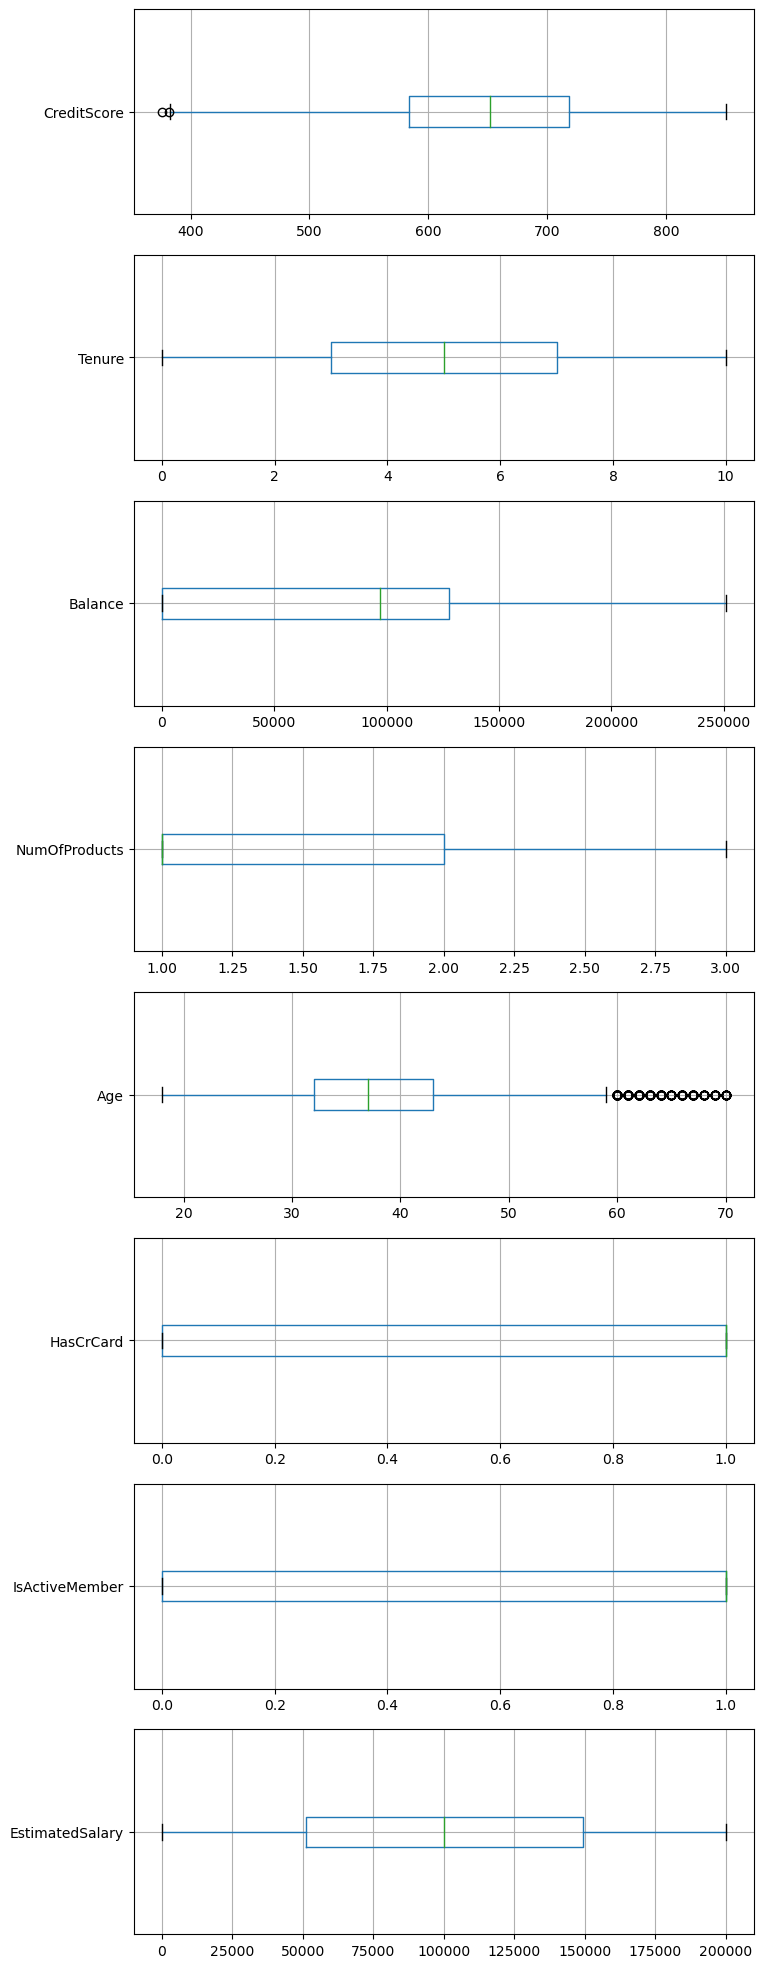

In [28]:
fig, axes = plt.subplots(8, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

<Axes: >

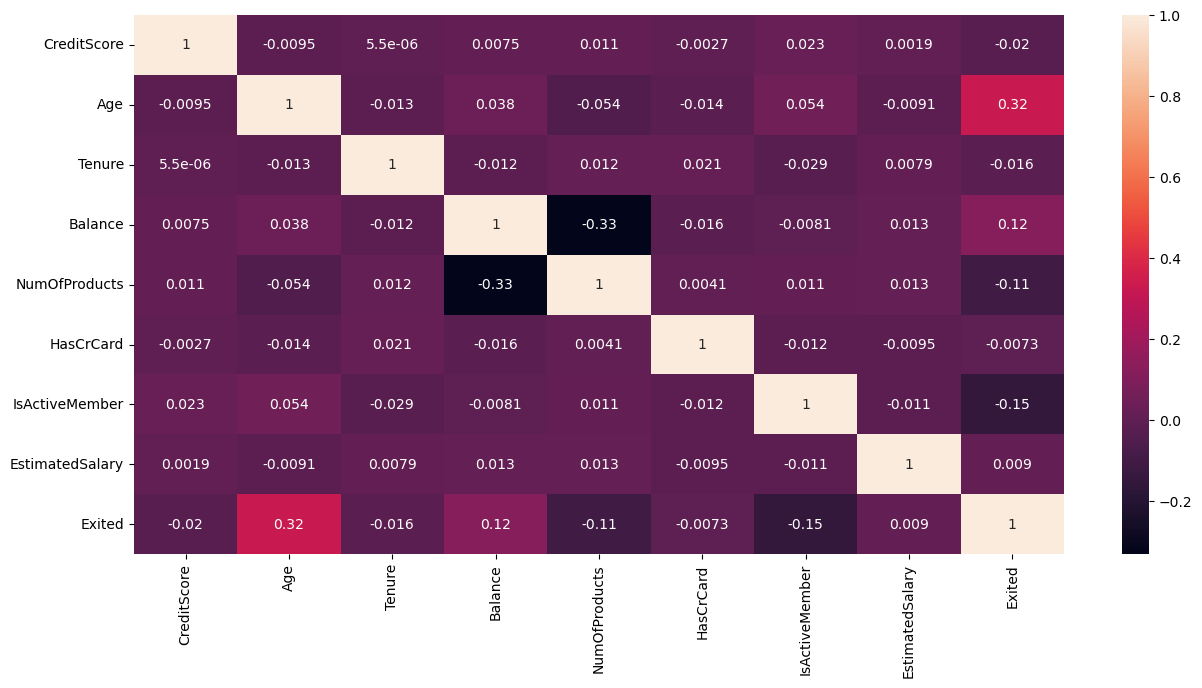

In [29]:
cor_mat=df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [30]:
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
# for feature in num_features:
#     ax = plt.subplot(12,3,plotnumber)
#     sns.boxplot(x="Exited", y= df[feature], data=df)
#     plt.xlabel(feature)
#     plotnumber+=1
# plt.show()

In [31]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.000000,9795.00000,9795.000000,9795.000000
mean,650.702501,38.385605,5.011639,76466.389866,1.515467,0.705258,0.51026,100026.435947,0.199490
std,96.190258,9.664320,2.890957,62408.892376,0.550716,0.455950,0.49992,57502.739707,0.399637
min,376.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.00000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.00000,50973.585000,0.000000
50%,652.000000,37.000000,5.000000,97133.920000,1.000000,1.000000,1.00000,100060.540000,0.000000
75%,718.000000,43.000000,7.000000,127634.770000,2.000000,1.000000,1.00000,149382.875000,0.000000
max,850.000000,70.000000,10.000000,250898.090000,3.000000,1.000000,1.00000,199992.480000,1.000000


In [32]:
cat_features=['Geography', 'Gender']

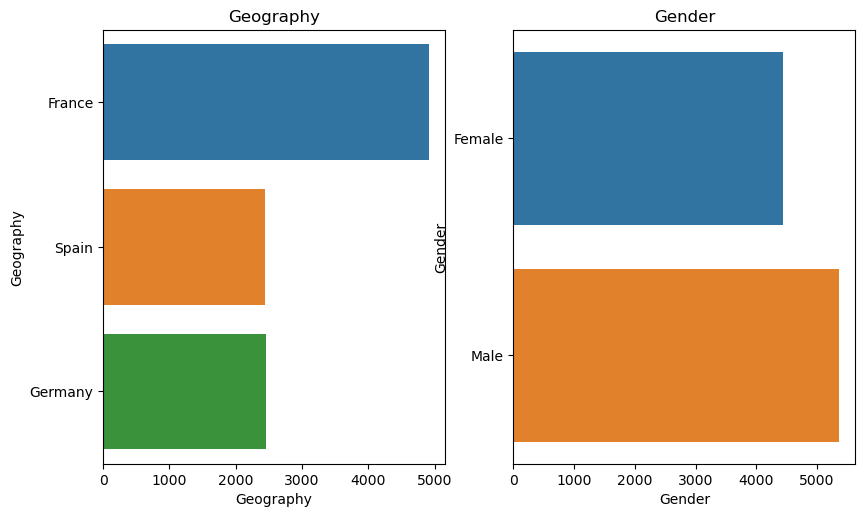

In [33]:
 #check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=df)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

In [ ]:
# for cat_features in cat_features:
#     sns.catplot(x='Exited', col=cat_features, kind='count', data= df)
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# data = df['marital'].value_counts()
# barplot = data.plot(kind='pie', ax=axes[0], title='MARITAL', autopct="%.2f", fontsize=14, ylabel='')
# countplot = sns.countplot(x='Marital', data=df, ax=axes[1])

In [ ]:
#EDA

In [34]:
df.duplicated().sum()


0

In [35]:
encoded_data = pd.get_dummies(df, dtype = int)
encoded_data.head(10)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1
10,528,31,6,102016.72,2,0,0,80181.12,0,1,0,0,0,1


In [36]:
# encoded_data.info()

In [37]:
normal_encoded = encoded_data.copy()

In [38]:
standard_encoded = encoded_data.copy()

# Normalization

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named 'normal_encoded' with your data

numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure']

scaler = MinMaxScaler(feature_range=(0, 1))

normal_encoded[numerical_features] = scaler.fit_transform(normal_encoded[numerical_features])


In [71]:
normal_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.512658,0.461538,0.2,0.000000,0.0,1,1,0.506735,1,1,0,0,1,0
1,0.489451,0.442308,0.1,0.334031,0.0,0,1,0.562709,0,0,0,1,1,0
2,0.265823,0.461538,0.8,0.636357,1.0,1,0,0.569654,1,1,0,0,1,0
3,0.681435,0.403846,0.1,0.000000,0.5,0,0,0.469120,0,1,0,0,1,0
4,1.000000,0.480769,0.2,0.500246,0.0,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.833333,0.403846,0.5,0.000000,0.5,1,0,0.481341,0,1,0,0,0,1
9996,0.295359,0.326923,1.0,0.228657,0.0,1,1,0.508490,0,1,0,0,0,1
9997,0.702532,0.346154,0.7,0.000000,0.0,0,1,0.210390,1,1,0,0,1,0
9998,0.835443,0.461538,0.3,0.299226,0.5,1,0,0.464429,1,0,1,0,0,1


In [72]:
numerical_features

['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure']

In [73]:
X1 = normal_encoded.drop('Exited',axis=1)
y1 = normal_encoded['Exited']

In [74]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42, stratify=y1)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train,y1_train, test_size=0.25, random_state=42, stratify=y1_train)
len(y1_train),len(y1_test),len(y1_val)

(5877, 1959, 1959)

In [75]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X1_smote, y1_smote = SMOTE().fit_resample(X1_train,y1_train)

# Display the class distribution before Smote
print("Class distribution before Smote:", Counter(y1))

print("Class distribution after Smote:", Counter(y1_smote))

Class distribution before Smote: Counter({0: 7841, 1: 1954})
Class distribution after Smote: Counter({0: 4705, 1: 4705})


In [76]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Display the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y1))

# Create an ADASYN resampler
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Apply ADASYN to balance the dataset
X1_adasyn, y1_adasyn = adasyn.fit_resample(X1_train, y1_train)

# Display the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y1_adasyn))

Class distribution before ADASYN: Counter({0: 7841, 1: 1954})
Class distribution after ADASYN: Counter({1: 4780, 0: 4705})


In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score


In [78]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

# Smote + Models

In [79]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 1000)
logr.fit(X1_smote, y1_smote)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.7284328739152629
Precision =  0.3961708394698085
Recall =  0.6879795396419437
F1 Score =  0.502803738317757


In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_smote, y1_smote)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.7258805513016845
Precision =  0.38769230769230767
Recall =  0.6445012787723785
F1 Score =  0.48414985590778103


In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X1_smote, y1_smote)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7708014293006636
Precision =  0.43776824034334766
Recall =  0.5217391304347826
F1 Score =  0.47607934655775963


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X1_smote, y1_smote)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8310362429811128
Precision =  0.575
Recall =  0.5882352941176471
F1 Score =  0.5815423514538559


In [ ]:
import pandas as pd
from tabulate import tabulate

# Sample evaluation metrics data
data = {
    'Model': ['LR', 'KNN', 'DT', 'RF'],
    'Accuracy': [0.73, 0.73, 0.79, 0.79],
    'Precision': [0.39, 0.39, 0.48, 0.49],
    'Recall': [0.68, 0.66, 0.69, 0.69],
    'F1 Score': [0.50, 0.49, 0.57, 0.57],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Use tabulate to format the DataFrame as a table
table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the table
print(table)


# Adasyn + Models

In [83]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 1000)
logr.fit(X1_adasyn, y1_adasyn)
y1_predict_lr = logr.predict(X1_test)
generate_model_report(y1_test, y1_predict_lr)

Accuracy =  0.7105666156202144
Precision =  0.37777777777777777
Recall =  0.6956521739130435
F1 Score =  0.4896489648964897


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_adasyn, y1_adasyn)
y1_predict_knn = knn.predict(X1_test)
generate_model_report(y1_test, y1_predict_knn)

Accuracy =  0.7039305768249107
Precision =  0.3678321678321678
Recall =  0.6726342710997443
F1 Score =  0.47558770343580475


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X1_adasyn, y1_adasyn)
y1_predict_dt = dt.predict(X1_test)
generate_model_report(y1_test, y1_predict_dt)

Accuracy =  0.7733537519142419
Precision =  0.4427645788336933
Recall =  0.5242966751918159
F1 Score =  0.48009367681498827


In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X1_adasyn, y1_adasyn)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8264420622766717
Precision =  0.5614457831325301
Recall =  0.5959079283887468
F1 Score =  0.5781637717121588


In [ ]:
import pandas as pd
from tabulate import tabulate

# Sample evaluation metrics data
data = {
    'Model': ['LR', 'KNN', 'DT', 'RF'],
    'Accuracy': [0.71, 0.70, 0.78, 0.78],
    'Precision': [0.38, 0.37, 0.47, 0.47],
    'Recall': [0.70, 0.67, 0.71, 0.73],
    'F1 Score': [0.49, 0.48, 0.57, 0.57],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Use tabulate to format the DataFrame as a table
table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the table
print(table)


# Hyperparameter Tuning using Grid Search

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [88]:
models_list = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]

In [89]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },
    
    'dt_hyperparameters': {
        
        'max_depth': [None, 2,4,6,8,10, 20, 30],
        'min_samples_leaf': [1, 2, 3, 4]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 30, 40, 50, 100],
        'max_depth': [None, 2,4,6,8,10, 20, 30],
        'min_samples_leaf': [1, 2, 3, 4]
    }
}

In [90]:
type(model_hyperparameters)

dict

In [91]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'dt_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [92]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [93]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'dt_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [94]:
model_keys[0]

'log_reg_hyperparameters'

In [95]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [96]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    grid_search = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    grid_search.fit(X1_val,y1_val)

    result.append({
        'model used' : model,
        'highest score' : grid_search.best_score_,
        'best hyperparameters' : grid_search.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['best hyperparameters','highest score','model used'])

  return result_dataframe

In [97]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
---------------------------------
DecisionTreeClassifier()
{'max_depth': [None, 2, 4, 6, 8, 10, 20, 30], 'min_samples_leaf': [1, 2, 3, 4]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=42)
{'n_estimators': [10, 20, 30, 40, 50, 100], 'max_depth': [None, 2, 4, 6, 8, 10, 20, 30], 'min_samples_leaf': [1, 2, 3, 4]}
---------------------------------


,best hyperparameters,highest score,model used
0,{'C': 1},0.823891,LogisticRegression(max_iter=1000)
1,"{'max_depth': 4, 'min_samples_leaf': 4}",0.843292,DecisionTreeClassifier()
2,{'n_neighbors': 10},0.812152,KNeighborsClassifier()
3,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.860128,RandomForestClassifier(random_state=42)


In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=10, min_samples_leaf=3, random_state =42)
rf.fit(X1_smote, y1_smote)
y1_predict_rf = rf.predict(X1_test)
generate_model_report(y1_test, y1_predict_rf)

Accuracy =  0.8233792751403778
Precision =  0.5462012320328542
Recall =  0.680306905370844
F1 Score =  0.6059225512528474


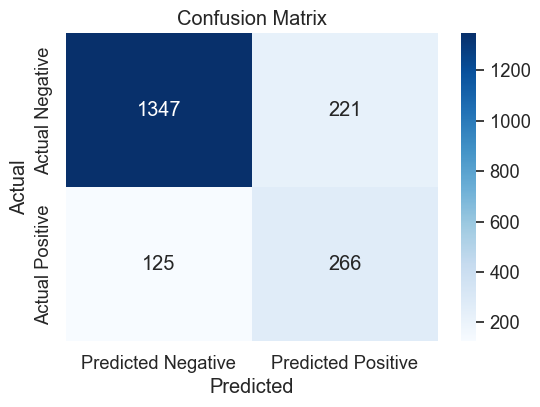

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y1_test, y1_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Standardization

In [122]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to be standardized
numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure']

# Perform standardization on the selected features
scaler = StandardScaler()
standard_encoded[numerical_features] = scaler.fit_transform(standard_encoded[numerical_features])


In [124]:
X2 = standard_encoded.drop('Exited',axis=1)
y2 = standard_encoded['Exited']

In [125]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42, stratify=y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train,y2_train, test_size=0.25, random_state=42, stratify=y2_train)
len(y2_train),len(y2_test),len(y2_val)

(5877, 1959, 1959)

In [126]:
from imblearn.over_sampling import SMOTE
X2_smote, y2_smote = SMOTE().fit_resample(X2_train,y2_train)

# Display the class distribution before Smote
print("Class distribution before ADASYN:", Counter(y2))

print("Class distribution after ADASYN:", Counter(y2_smote))

Class distribution before ADASYN: Counter({0: 7841, 1: 1954})
Class distribution after ADASYN: Counter({0: 4705, 1: 4705})


In [127]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Display the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y2))

# Create an ADASYN resampler
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Apply ADASYN to balance the dataset
X2_adasyn, y2_adasyn = adasyn.fit_resample(X2_train, y2_train)

# Display the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y2_adasyn))

Class distribution before ADASYN: Counter({0: 7841, 1: 1954})
Class distribution after ADASYN: Counter({0: 4705, 1: 4467})


# Smote + Models

In [128]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 1000)
logr.fit(X2_smote, y2_smote)
y2_predict_lr = logr.predict(X2_test)
generate_model_report(y2_test, y2_predict_lr)

Accuracy =  0.7447677386421644
Precision =  0.4084033613445378
Recall =  0.6214833759590793
F1 Score =  0.49290060851926976


In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X2_smote, y2_smote)
y2_predict_knn = knn.predict(X2_test)
generate_model_report(y2_test, y2_predict_knn)

Accuracy =  0.77947932618683
Precision =  0.4642233856893543
Recall =  0.680306905370844
F1 Score =  0.5518672199170125


In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X2_smote, y2_smote)
y2_predict_dt = dt.predict(X2_test)
generate_model_report(y2_test, y2_predict_dt)

Accuracy =  0.7759060745278203
Precision =  0.45161290322580644
Recall =  0.5728900255754475
F1 Score =  0.5050732807215332


In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X2_smote, y2_smote)
y2_predict_rf = rf.predict(X2_test)
generate_model_report(y2_test, y2_predict_rf)

Accuracy =  0.8320571720265442
Precision =  0.582010582010582
Recall =  0.5626598465473146
F1 Score =  0.5721716514954487


# Adasyn + Models


In [132]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 1000)
logr.fit(X2_adasyn, y2_adasyn)
y2_predict_lr = logr.predict(X2_test)
generate_model_report(y2_test, y2_predict_lr)

Accuracy =  0.7417049515058703
Precision =  0.40558292282430214
Recall =  0.6317135549872123
F1 Score =  0.494


In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X2_adasyn, y2_adasyn)
y2_predict_knn = knn.predict(X2_test)
generate_model_report(y2_test, y2_predict_knn)

Accuracy =  0.7524247064828994
Precision =  0.4276923076923077
Recall =  0.710997442455243
F1 Score =  0.5341018251681077


In [134]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X2_adasyn, y2_adasyn)
y2_predict_dt = dt.predict(X2_test)
generate_model_report(y2_test, y2_predict_dt)

Accuracy =  0.7595712098009189
Precision =  0.42063492063492064
Recall =  0.5421994884910486
F1 Score =  0.4737430167597765


In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X2_adasyn, y2_adasyn)
y2_predict_rf = rf.predict(X2_test)
generate_model_report(y2_test, y2_predict_rf)

Accuracy =  0.8249106687085248
Precision =  0.5585365853658537
Recall =  0.5856777493606138
F1 Score =  0.571785268414482


In [136]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    grid_search = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    grid_search.fit(X2_val,y2_val)

    result.append({
        'model used' : model,
        'highest score' : grid_search.best_score_,
        'best hyperparameters' : grid_search.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['best hyperparameters','highest score','model used'])

  return result_dataframe

In [137]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
---------------------------------
DecisionTreeClassifier()
{'max_depth': [None, 2, 4, 6, 8, 10, 20, 30], 'min_samples_leaf': [1, 2, 3, 4]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=42)
{'n_estimators': [10, 20, 30, 40, 50, 100], 'max_depth': [None, 2, 4, 6, 8, 10, 20, 30], 'min_samples_leaf': [1, 2, 3, 4]}
---------------------------------


,best hyperparameters,highest score,model used
0,{'C': 1},0.819812,LogisticRegression(max_iter=1000)
1,"{'max_depth': 4, 'min_samples_leaf': 1}",0.841761,DecisionTreeClassifier()
2,{'n_neighbors': 10},0.830020,KNeighborsClassifier()
3,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_es...",0.860640,RandomForestClassifier(random_state=42)


In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=2, random_state =42)
rf.fit(X2_adasyn, y2_adasyn)
y2_predict_rf = rf.predict(X2_test)
generate_model_report(y2_test, y2_predict_rf)

Accuracy =  0.8289943848902501
Precision =  0.5669856459330144
Recall =  0.6061381074168798
F1 Score =  0.5859085290482077


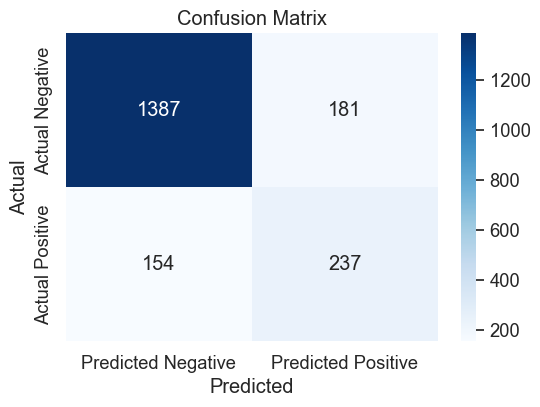

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels and y_pred is the predicted labels
conf_matrix = confusion_matrix(y2_test, y2_predict_rf)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for labels

sns.heatmap(
    conf_matrix,
    annot=True,  # Display values in the cells
    fmt="d",     # Integer formatting for values
    cmap="Blues",  # Color map
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
    cbar=True,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


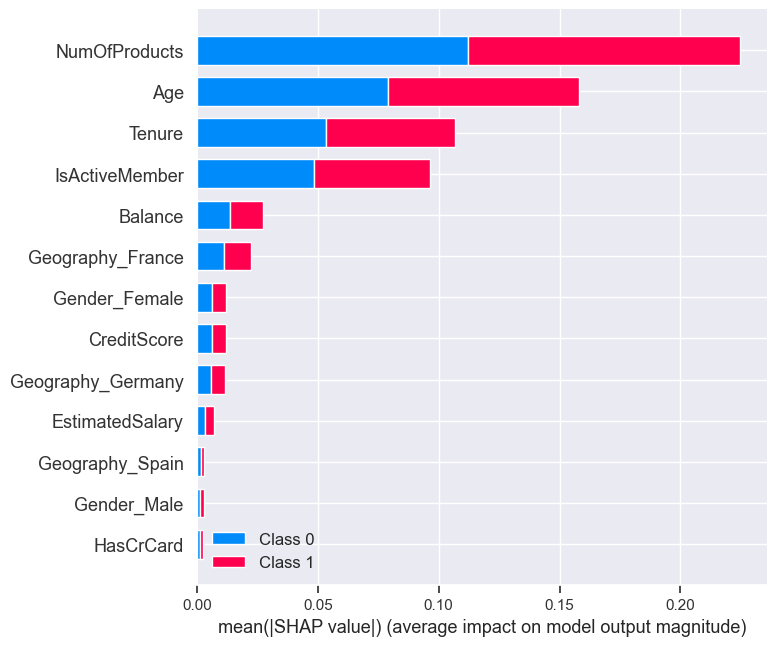

In [151]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(rf)

# Calculate SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X2_test.iloc[0, :].values.reshape(1, -1))

# Visualize the SHAP values for the instance
shap.summary_plot(shap_values, X2_test)


In [152]:
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X2_test.values, training_labels=y2_adasyn, mode="classification")

explanation = explainer.explain_instance(X2_test.values[0], rf.predict_proba)




X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [153]:
explanation.show_in_notebook()


In [154]:
 explanation.as_list()


[('4 <= -0.94', -0.2289624194595454),
 ('0.00 < 6 <= 1.00', -0.12500586959237248),
 ('3 <= -1.23', -0.07612164932892479),
 ('-0.14 < 1 <= 0.48', -0.031546467836524),
 ('7 > 0.86', 0.023046751625441265),
 ('11 <= 0.00', -0.01929257289072896),
 ('2 <= -0.70', -0.01327091412269062),
 ('0.00 < 12 <= 1.00', -0.010439812534234153),
 ('0.00 < 8 <= 1.00', -0.00841263445009014),
 ('9 <= 0.00', 0.0075064975620009215)]